In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

SEED = 123
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

In [82]:
del train
gc.collect()

21

In [83]:
dtype = {
    'category': 'uint32'
}

train = pd.read_csv('../data/raw/205e1808-6-dataset/train.csv',
                    usecols=['ID', 'browserid', 'click']
                   )

# test  = pd.read_csv('../data/raw/205e1808-6-dataset/test.csv',
#                     usecols=['ID', 'devid']
#                    )

** Distribution of browser in train vs test **

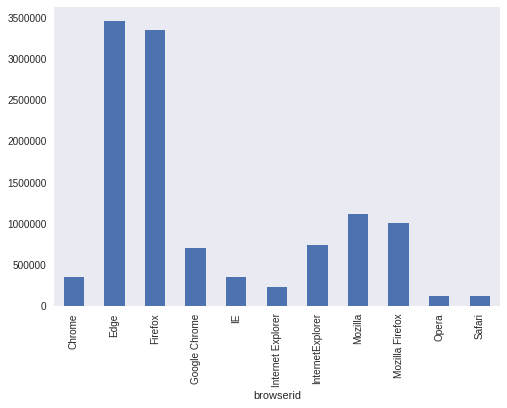

In [7]:
train.groupby(['browserid']).size().plot(kind='bar');

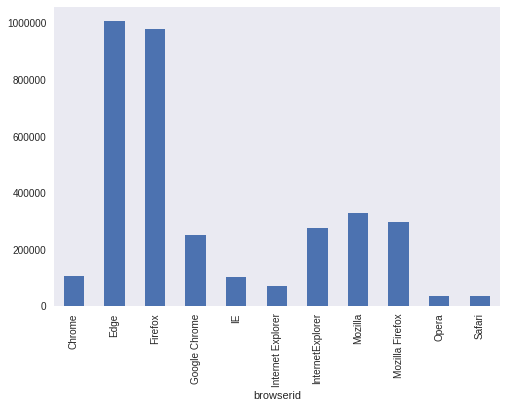

In [8]:
test.groupby(['browserid']).size().plot(kind='bar');

** Distribution of hour of the day in train and test **

In [10]:
train = train.assign(hour=train.datetime.dt.hour)
test  = test.assign(hour=test.datetime.dt.hour)

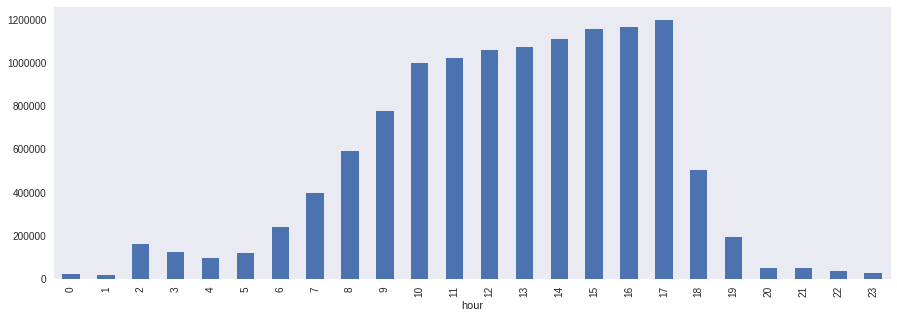

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby(['hour']).size().plot(kind='bar', ax=ax);

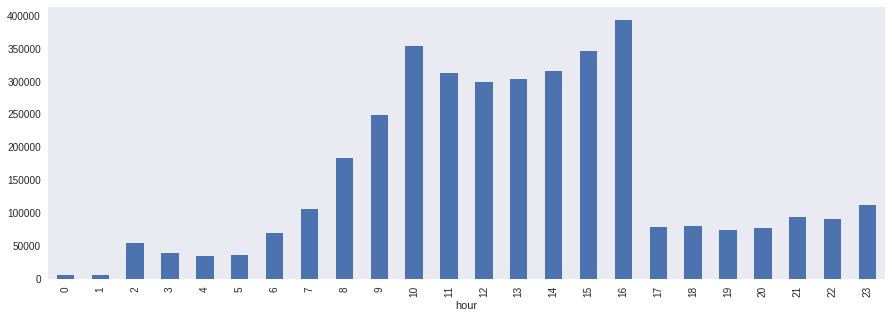

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby(['hour']).size().plot(kind='bar', ax=ax);

** Distribution of offers in train vs test **

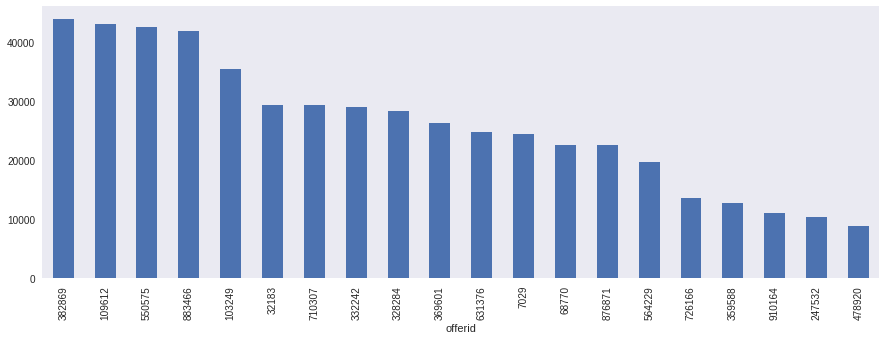

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('offerid').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

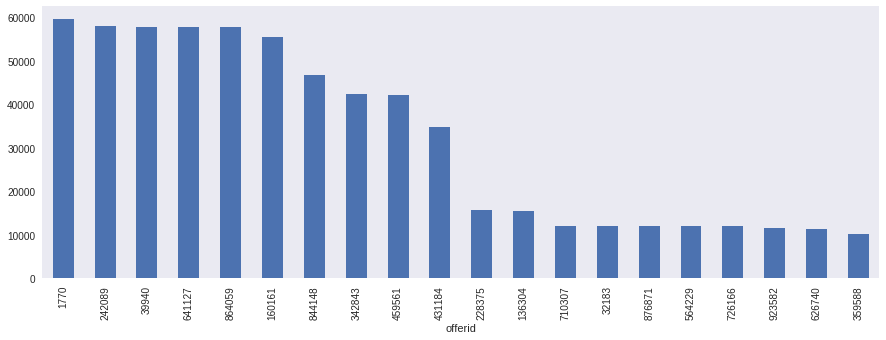

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby('offerid').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

** Distribution of category in train vs test **

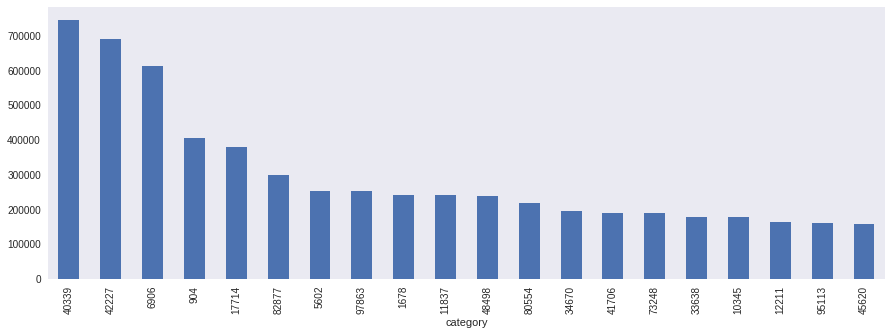

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('category').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

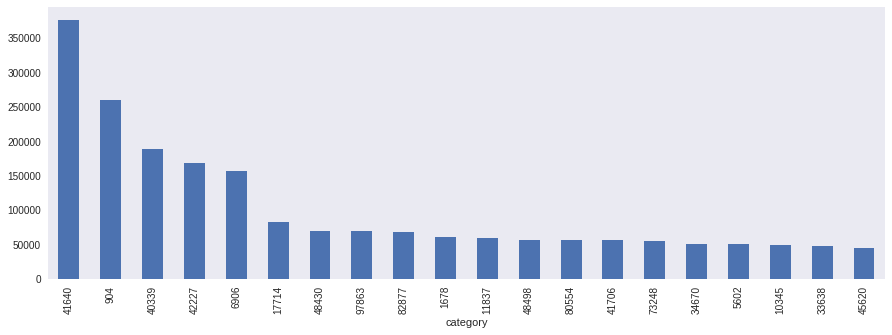

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby('category').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

** Distribution of merchant in train vs test **

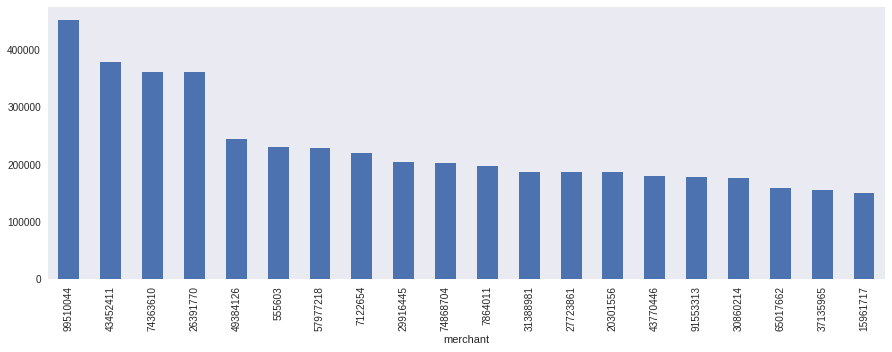

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('merchant').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

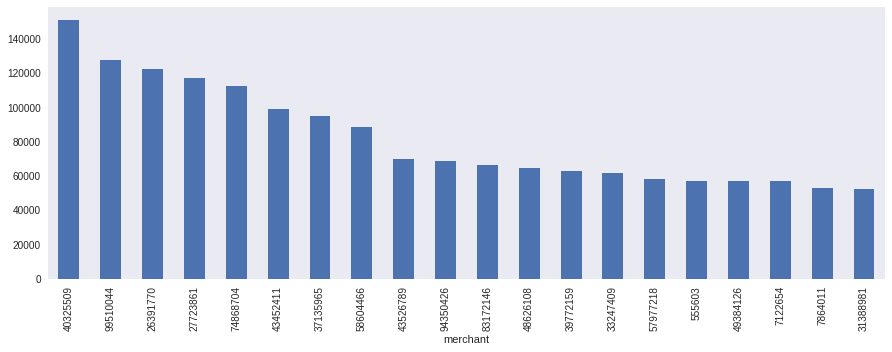

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby('merchant').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

** Distribution of country code in train vs test **

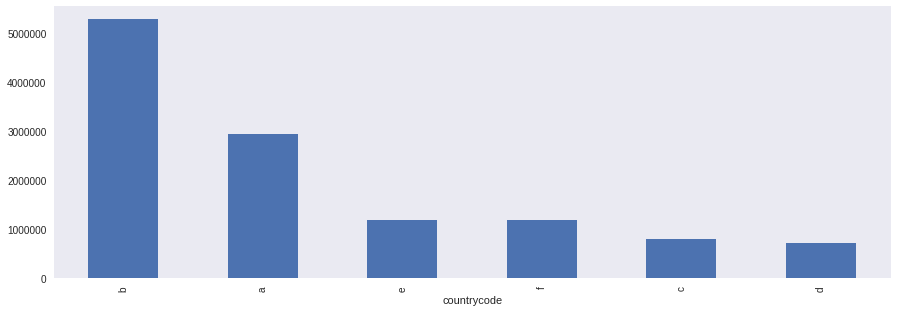

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('countrycode').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

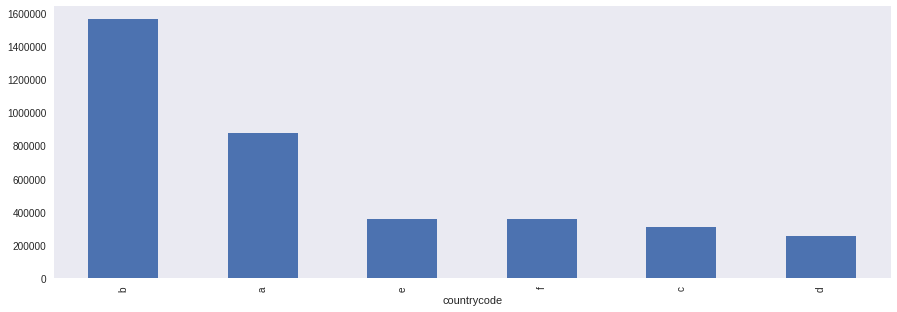

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby('countrycode').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

** Distribution of device in train vs test **

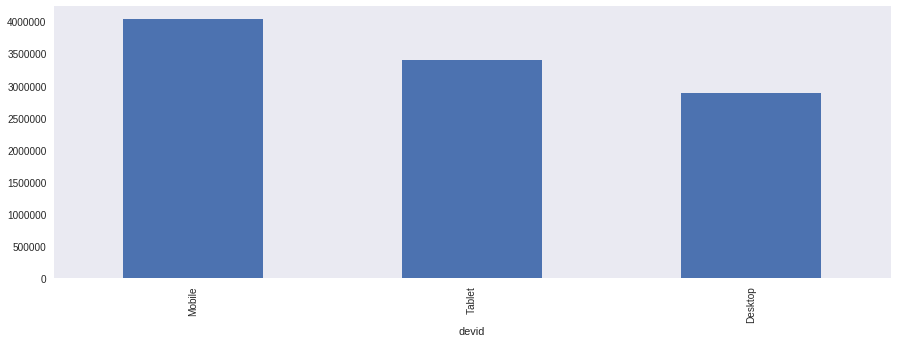

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('devid').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

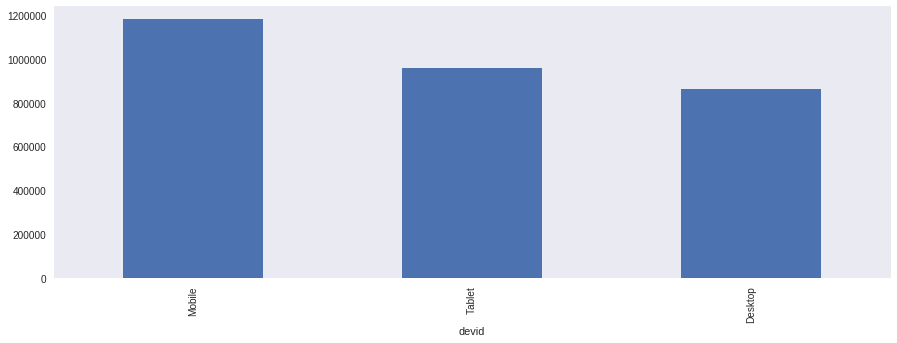

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
test.groupby('devid').size().sort_values(ascending=False).iloc[:20].plot(kind='bar', ax=ax);

** Device id and click **

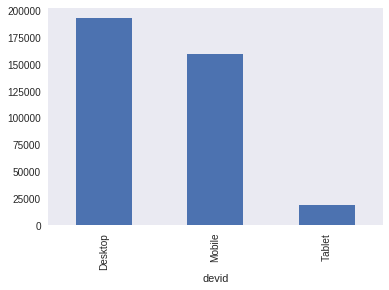

In [46]:
train.groupby('devid')['click'].sum().plot(kind='bar');

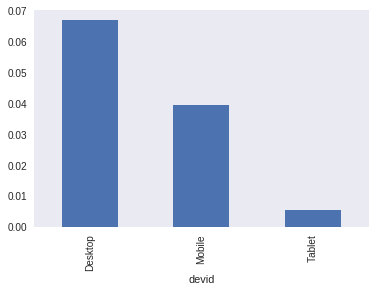

In [47]:
train.groupby('devid')['click'].mean().plot(kind='bar');

** Desktop has highest chances of getting a click **

## Hour of the day vs clicks

In [50]:
train = train.assign(hour=train.datetime.dt.hour)

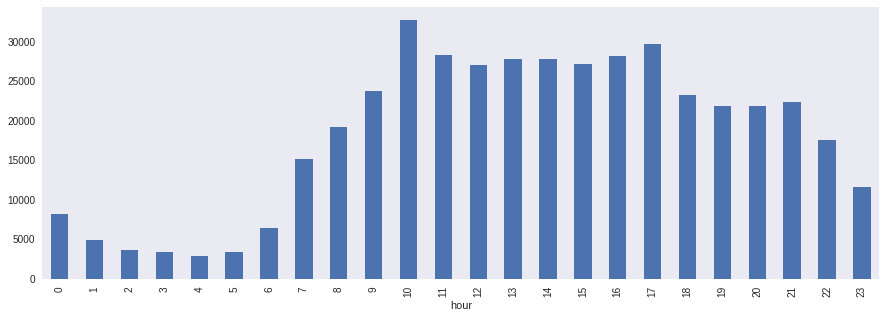

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('hour')['click'].sum().plot(kind='bar', ax=ax);

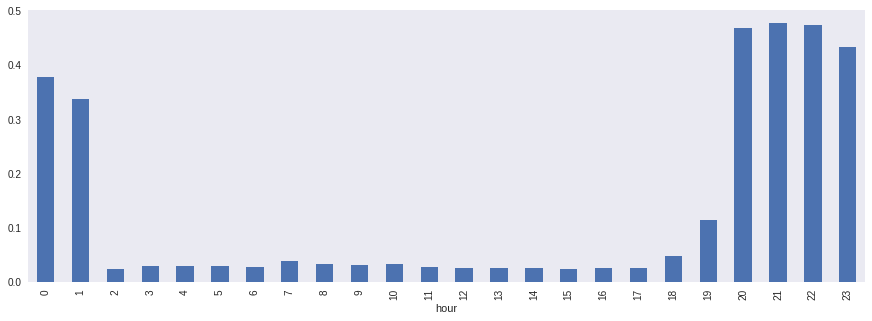

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('hour')['click'].mean().plot(kind='bar', ax=ax);

## Day of the week vs Clicks

In [56]:
train = train.assign(dow=train.datetime.dt.weekday)

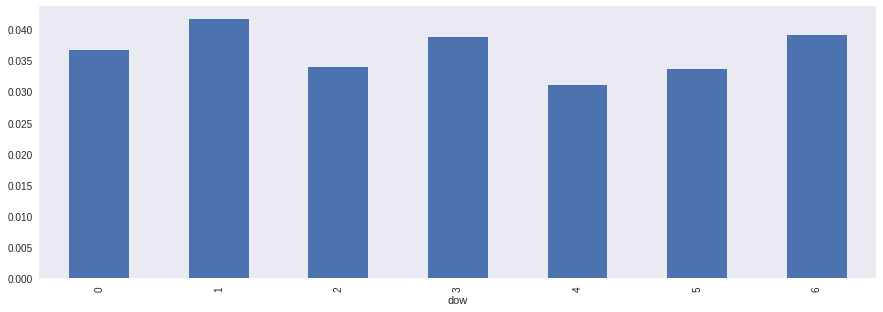

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('dow')['click'].mean().plot(kind='bar', ax=ax);

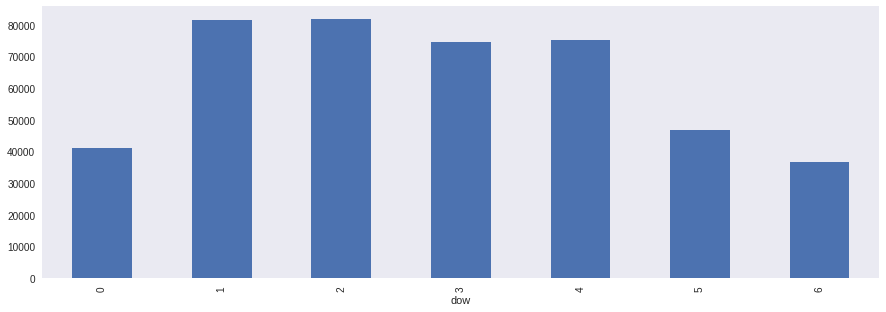

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
train.groupby('dow')['click'].sum().plot(kind='bar', ax=ax);

## Browser vs Clicks

In [87]:
replacement = {
    'Chrome': 'Google Chrome',
    'IE'    : 'Internet Explorer',
    'InternetExplorer': 'Internet Explorer',
    'Firefox': 'Mozilla Firefox',
    'Mozilla': 'Mozilla Firefox'
}

train.loc[:, 'browserid'] = train.browserid.replace(replacement)

In [88]:
train.groupby('browserid')['click'].sum()

browserid
Edge                   8474
Google Chrome        157866
Internet Explorer    207810
Mozilla Firefox       32984
Opera                  4158
Safari                 4208
Name: click, dtype: int64

In [89]:
train.groupby('browserid')['click'].mean()

browserid
Edge                 0.002452
Google Chrome        0.150923
Internet Explorer    0.157351
Mozilla Firefox      0.006023
Opera                0.036053
Safari               0.036605
Name: click, dtype: float64